In [1]:
!pip install opencv-python==3.1.0.4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
!wget https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa

--2020-11-15 16:41:09--  https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa [following]
--2020-11-15 16:41:09--  https://www.dropbox.com/sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8e44f158e5689970daed1ff11.dl.dropboxusercontent.com/zip_download_get/Amp9gFES89djt9uOCHLhI6sKMPP_3I5dActiaT7_cRRE5QFfzFdwmQ6R-OT51HLQ9rcaIwOqssurVG3pEn_eAuZuYufhSn-xjLuau-i1mNRNfg [following]
--2020-11-15 16:41:10--  https://uce8e44f158e5689970daed1ff11.dl.dropboxusercontent.com/zip_download_get/Amp9gFES89djt9uOCHLhI6sKMPP_3I5dActiaT7_cRRE5QFfzFdwmQ6R-OT51HLQ9rcaIwOqssurVG3pEn_eAuZuY

In [4]:
!unzip AAA963Q5FMQXHl-XIxxLsDDJa

Archive:  AAA963Q5FMQXHl-XIxxLsDDJa
mapname:  conversion of  failed
 extracting: glasses.png             
 extracting: mustache.png            
 extracting: Nose18x15.xml           
 extracting: Jamie_Before.jpg        
 extracting: frontalEyes35x16.xml    


In [5]:
#load model
noseCascade = cv2.CascadeClassifier('/content/Nose18x15.xml')
eyesCascade = cv2.CascadeClassifier('/content/frontalEyes35x16.xml')

In [6]:
#read image
img = plt.imread('Jamie_Before.jpg')

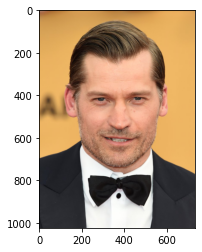

In [7]:
plt.imshow(img)

In [8]:
img.shape

(1024, 733, 3)

In [9]:
eye = eyesCascade.detectMultiScale(img)[0]
print(eye)

[218 349 317 145]


In [10]:
eye_x,eye_y,eye_w,eye_h = eye

In [11]:
nose = noseCascade.detectMultiScale(img,1.5)[0]
print(nose)

[308 476 137 114]


In [12]:
nose_x,nose_y,nose_w,nose_h = nose

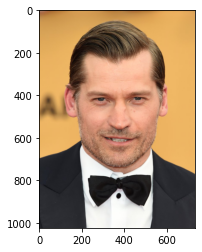

In [13]:
plt.imshow(img)

In [14]:
mustache = plt.imread('./mustache.png')
glasses = plt.imread('./glasses.png')

In [15]:
mustache.shape

(320, 640, 4)

In [16]:
glasses.shape

(221, 483, 4)

In [17]:
#resize glasses
glasses = cv2.resize(glasses, (eye_w, eye_h))

In [18]:
img = img.copy()

In [19]:
for i in range(glasses.shape[0]):
  for j in range(glasses.shape[1]):
    if glasses[i,j,3] > 0:
      img[eye_y + i, eye_x + j, :] = glasses[i, j, :-1]

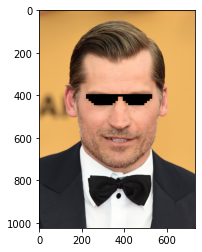

In [20]:
plt.imshow(img)

In [21]:
#resize mustache
mustache = cv2.resize(mustache, (nose_w, nose_h))

In [22]:
for i in range(mustache.shape[0]):
  for j in range(mustache.shape[1]):
    if mustache[i,j,3] > 0:
      img[nose_y + i + 35, nose_x + j, :] = mustache[i, j, :-1]

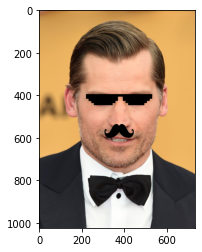

In [23]:
plt.imshow(img)